#This is my first project that I will upload to Kaggle. I will do it as well as I can and explain my decisions as well.#
Please, feel free to criticize! It is the only way someone can get better!

Let's do an EDA (Exploratory Data Analysis) to see what this dataset can offer.
First let us see what our database consists of.

In [81]:
import pandas as pd
import csv
import collections, numpy

data = pd.read_csv('TravelInsurancePrediction.csv')

#data.describe()
#data.tail()
#print(data.list())
print(data['FamilyMembers'].unique())
print(data['FamilyMembers'].isnull().sum())
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

[6 7 4 3 8 9 5 2]
0


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


Here we have:
**Age**: The client's age in years.
**Employment Type**: If the person works in the __Government Sector__ or __Private Sector/Self Employed__ .
**GraduateOrNot**: If the client has an university degree.
**AnnualIncome**: How much the client makes per year.
**FamilyMembers**: How many people live in the same house.
**ChronicDiseases**: If the client has a Chronic Disease (**1** for yes **0** for no).
**FrequentFlyer**: If the client is a frequent flyer. An explanation was not found.
**EverTravelledAbroad**: If a client has ever been outside his homecountry.
**TravelInsurance**: If the client has aquired TravelInsurance (**1** for yes **0** for no).

There are 1987 lines of data to work with, lets make the most of it!

First lets see the profile of our clients by plotting histograms for each of our variables.

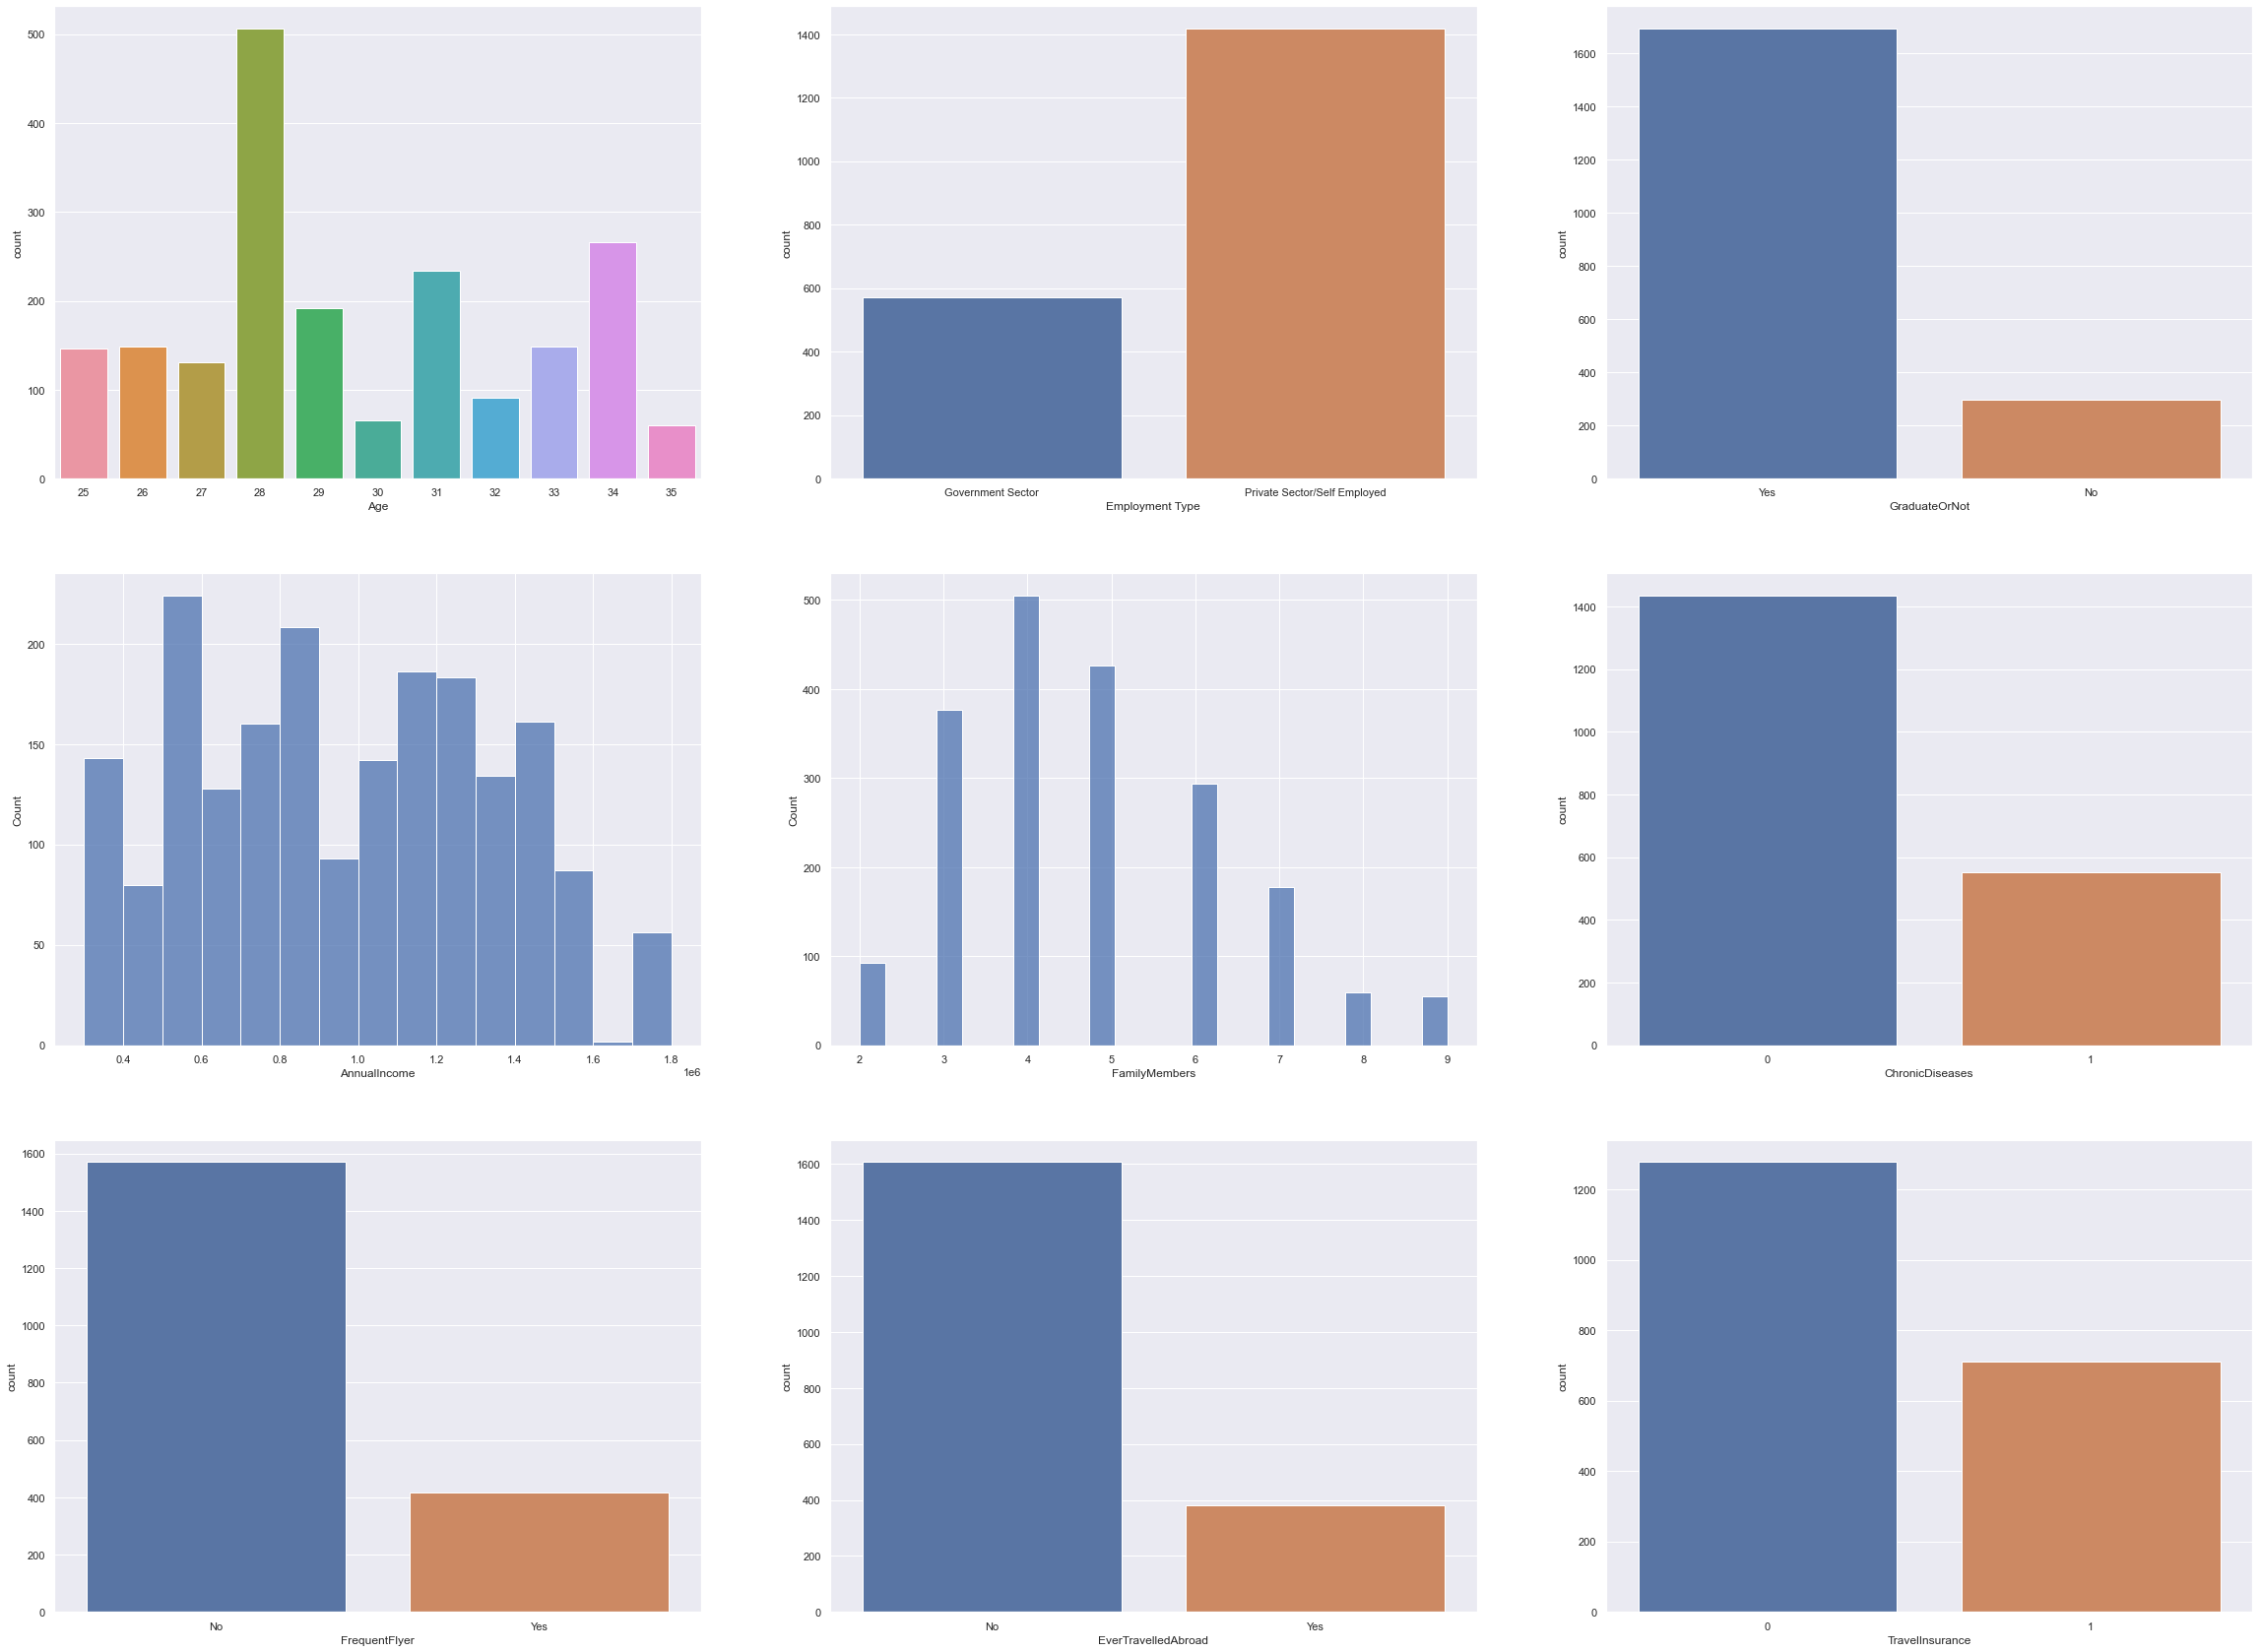

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

fig , ax = plt.subplots(nrows = 3, ncols = 3)

sns.countplot(data = data, x = 'Age', ax=ax[0][0])
sns.countplot(x='Employment Type', data=data, ax=ax[0][1])
sns.countplot(data = data, x = 'GraduateOrNot', ax=ax[0][2])
sns.histplot(data = data, x = 'AnnualIncome', ax=ax[1][0])
sns.histplot(data = data, x = 'FamilyMembers', ax=ax[1][1])
sns.countplot(data = data, x = 'ChronicDiseases', ax=ax[1][2])
sns.countplot(data = data, x = 'FrequentFlyer', ax=ax[2][0])
sns.countplot(data = data, x = 'EverTravelledAbroad', ax=ax[2][1])
sns.countplot(data = data, x = 'TravelInsurance', ax=ax[2][2])

sns.set(rc={'figure.figsize':(40,30)})

We can see here that the great majority of travellers are 26-year-old from a group ranging from 25 to 35 years old. The data might have been tampered with because this is too much of a coincidence (a ten year gap in the group).
The majority of clients are graduted, work in the private sector, are not frequent flyers and never have been abroad.
The majority of client have families of 3 up to 5 people.
Maybe single people are not allowed to buy packages?

Now lets take a look at our correlations!
Remember: We can't calculate correlations with "Yes" or "No". They do not have numerical values, even if we binarize those (covnert yes or no to 1s and 0s).
It is a very serious mistake to do that! In order to calculate correlation we have to calculate averages. We can't calculate averages of 'Yes' and 'No', the same way we can't assume that 'Good' and 'Very good' can have numerical values. These are **Categorical Variables** and can't be included in a correlation calculus.

Here we will only calculate correlations with our quantitative variables.

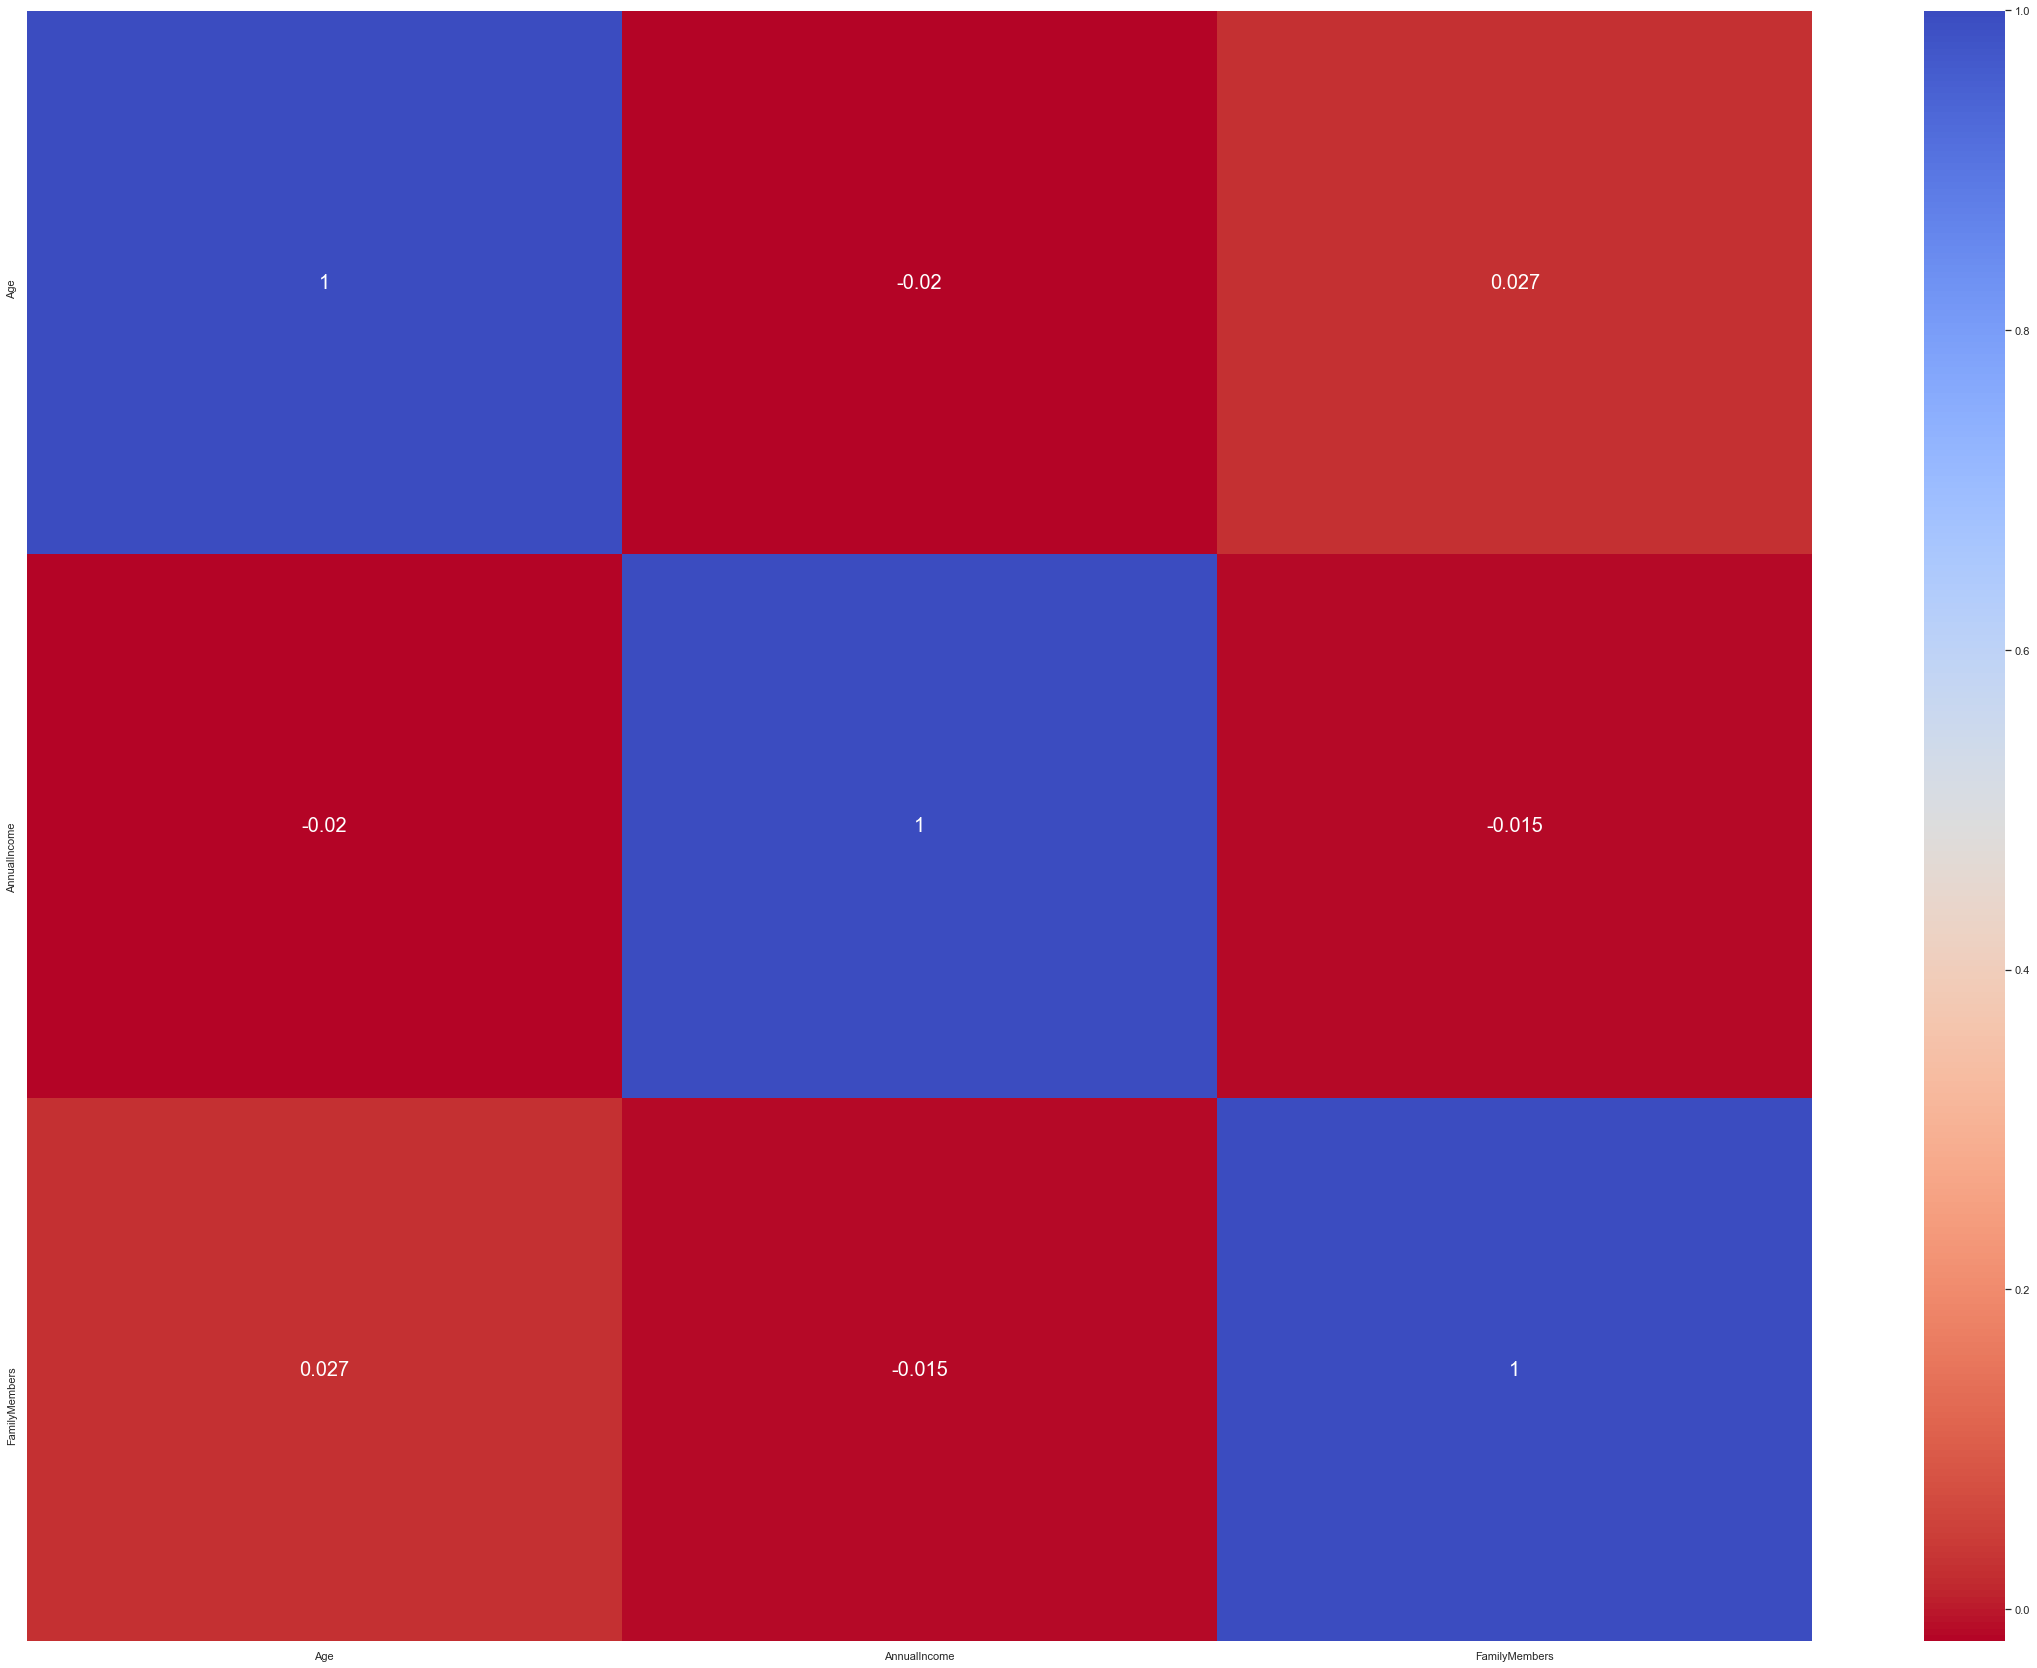

In [84]:
from sklearn.preprocessing import StandardScaler

#Selecting quantitative variables.
quantitatives = data.loc[ :,['Age','AnnualIncome','FamilyMembers']]

#Normalization of observations.
quantitatives_scaled = pd.DataFrame(StandardScaler().fit_transform(quantitatives))

#Naming columns again.
quantitatives_scaled.columns=['Age','AnnualIncome','FamilyMembers']

#Calculating correlations
data_correlation = quantitatives_scaled.corr()

#Plotting a heatmap
sns.heatmap(data_correlation, cmap='coolwarm_r', annot_kws={'size':20},annot=True)
sns.set(rc={"figure.figsize":(15, 10)})
plt.show()

They are weakly correlationed, so a PCA is out of question.

Lets binarize the data just to make it regular.

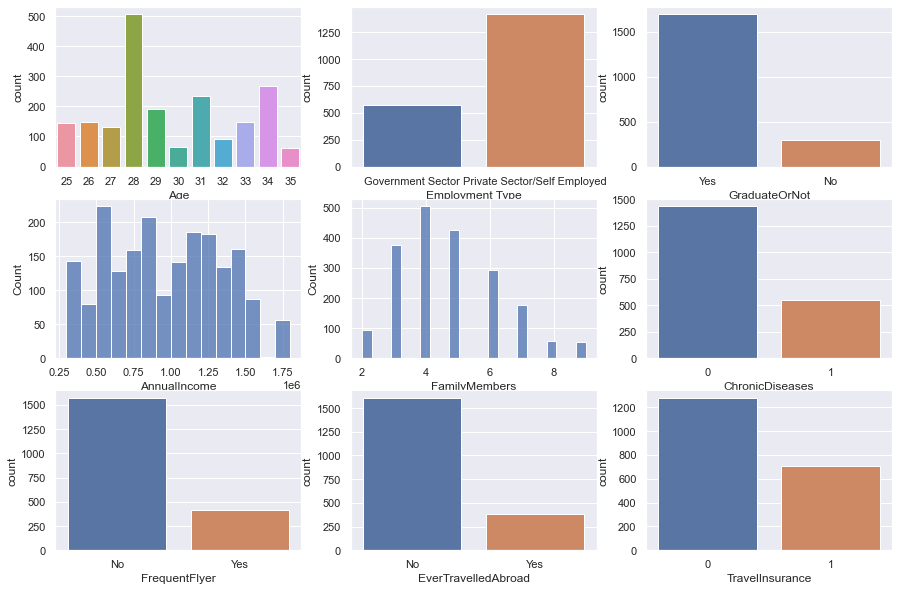

In [85]:
fig , ax = plt.subplots(nrows = 3, ncols = 3)

sns.countplot(data = data, x = 'Age', ax=ax[0][0])
sns.countplot(x='Employment Type', data=data, ax=ax[0][1])
sns.countplot(data = data, x = 'GraduateOrNot', ax=ax[0][2])
sns.histplot(data = data, x = 'AnnualIncome', ax=ax[1][0])
sns.histplot(data = data, x = 'FamilyMembers', ax=ax[1][1])
sns.countplot(data = data, x = 'ChronicDiseases', ax=ax[1][2])
sns.countplot(data = data, x = 'FrequentFlyer', ax=ax[2][0])
sns.countplot(data = data, x = 'EverTravelledAbroad', ax=ax[2][1])
sns.countplot(data = data, x = 'TravelInsurance', ax=ax[2][2])

sns.set(rc={'figure.figsize':(40,30)})

Great. However our insights are limited to that.
I will try to compare people who hire insurance with the other variables we have.
That way we will discover which group of people are more inclined to buy insurance.
Maybe people with big families buy it more often? Who knows?

<AxesSubplot:xlabel='EverTravelledAbroad', ylabel='TravelInsurance'>

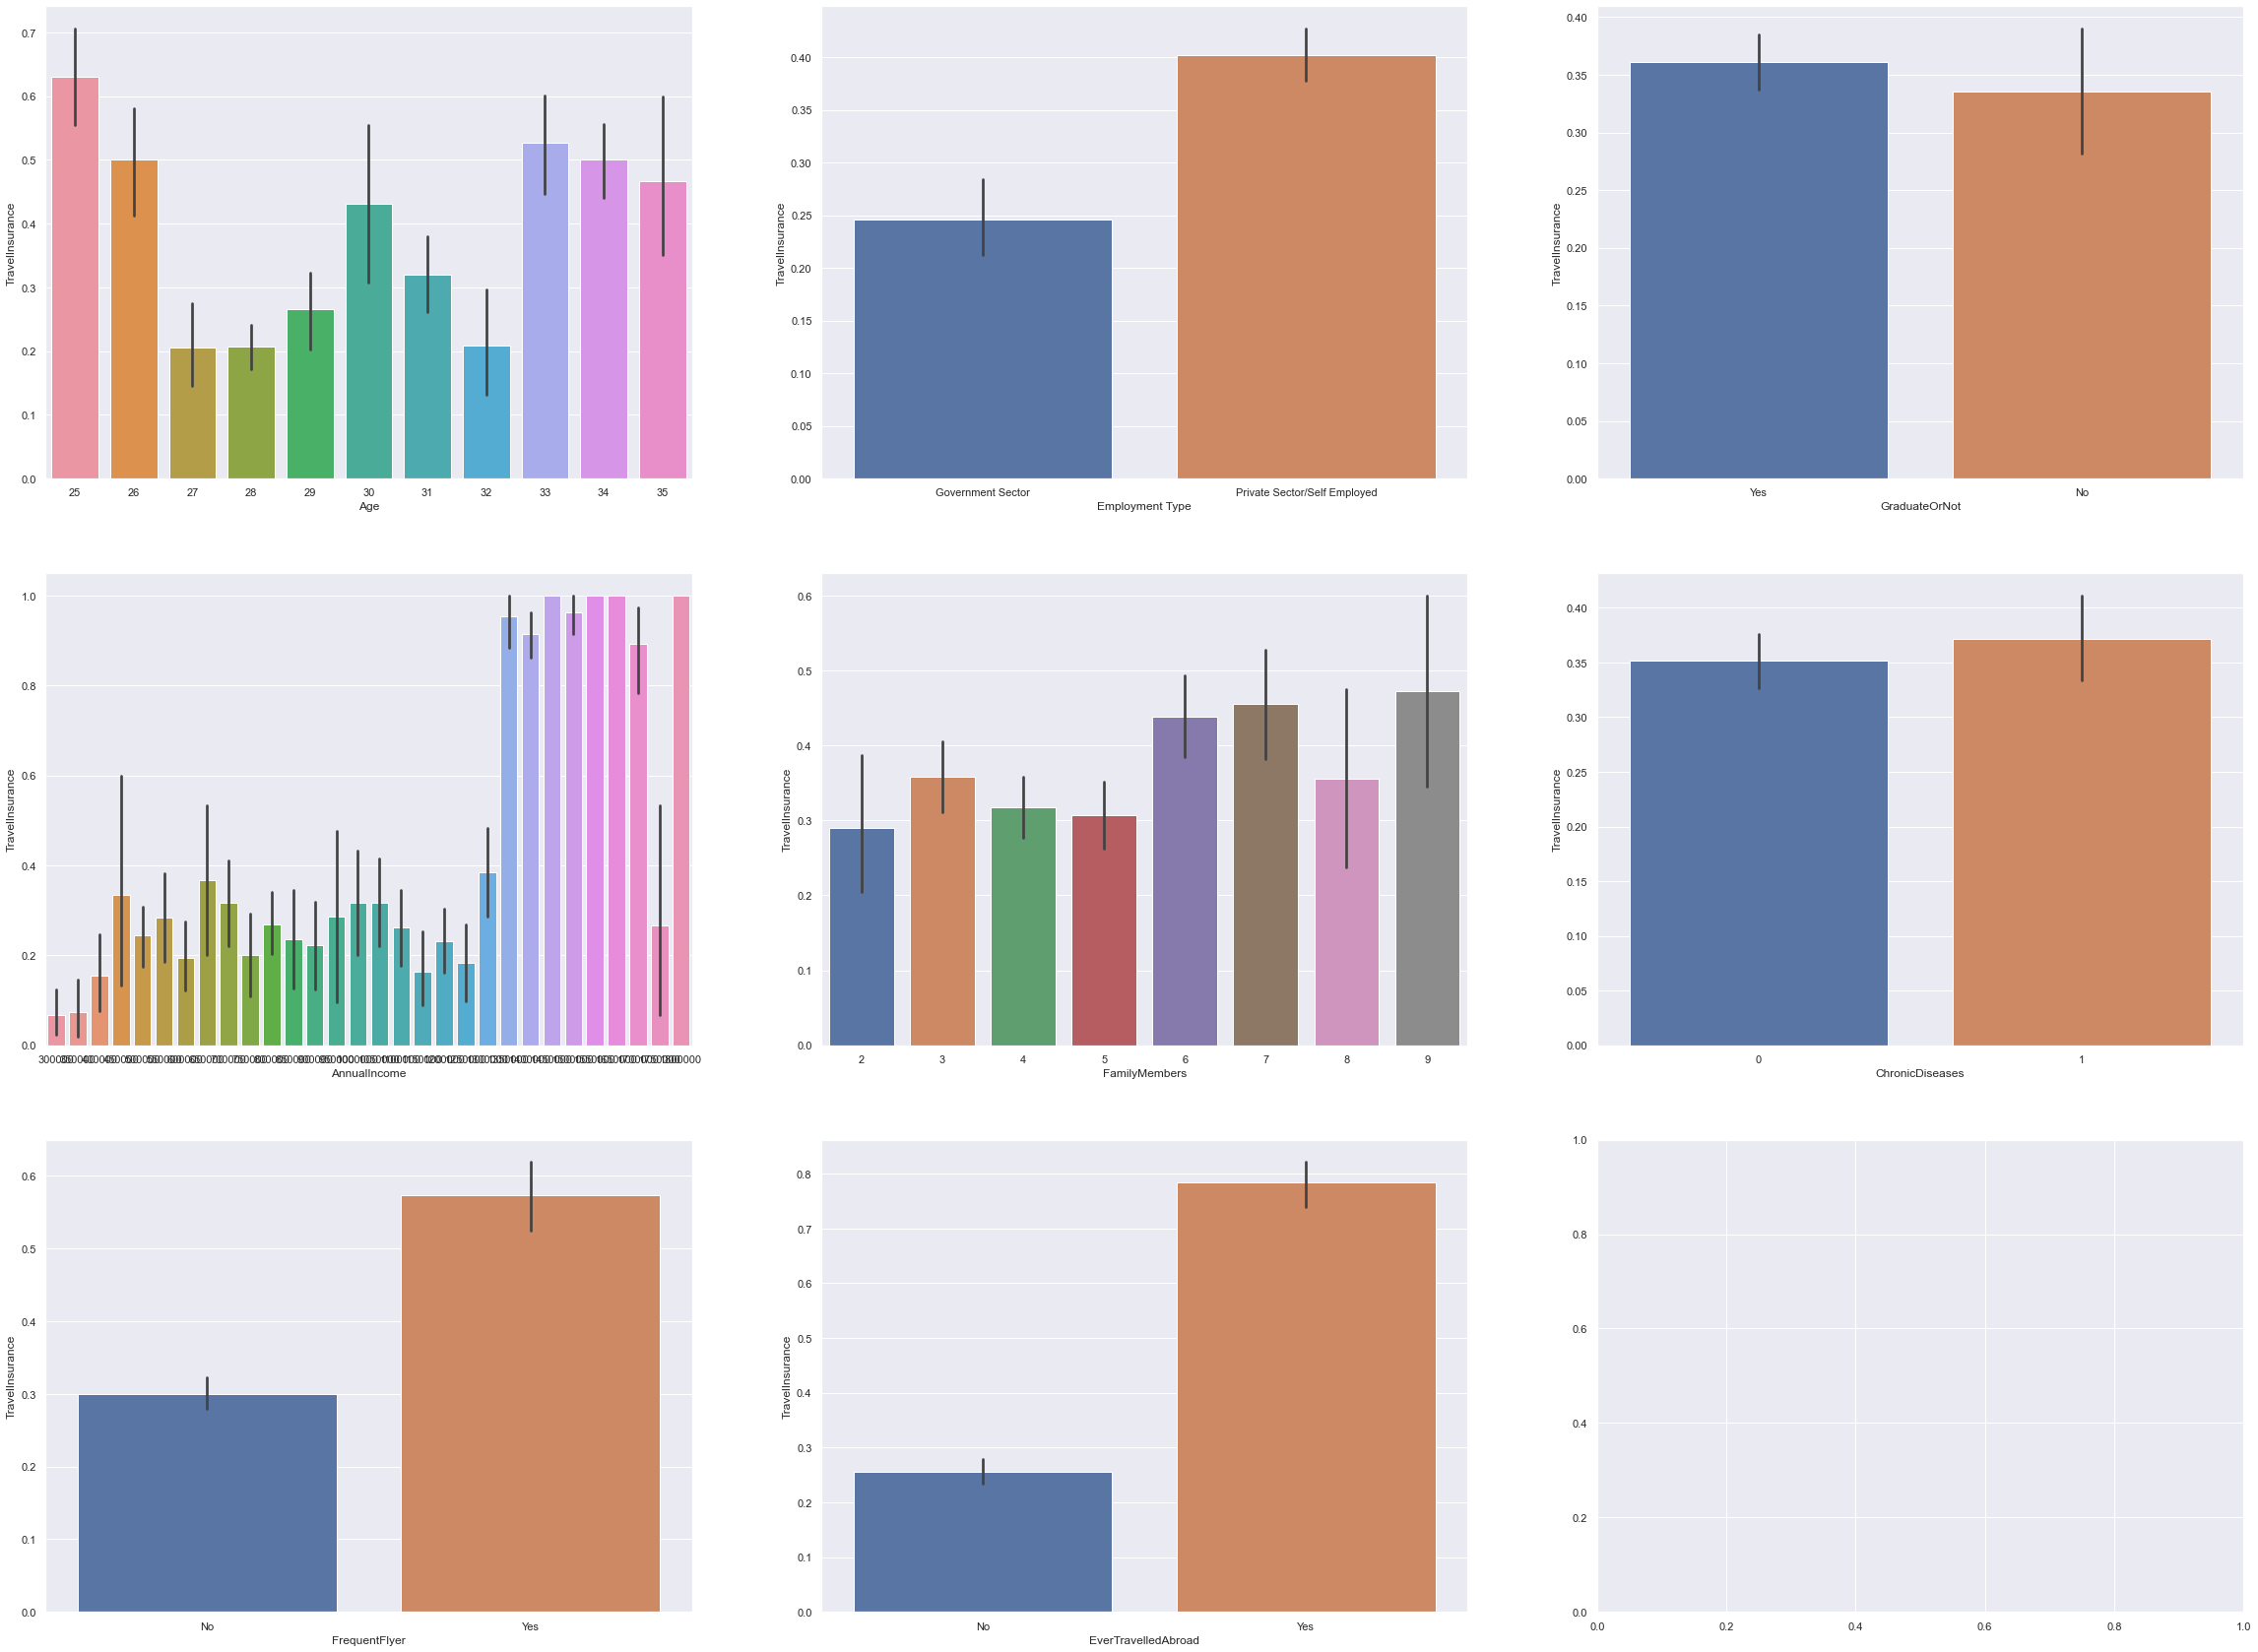

In [86]:
fig , ax = plt.subplots(nrows = 3, ncols = 3)

sns.barplot(x="Age",y="TravelInsurance",data=data,ax=ax[0][0])
sns.barplot(x="Employment Type",y="TravelInsurance",data=data,ax=ax[0][1])
sns.barplot(x="GraduateOrNot",y="TravelInsurance",data=data,ax=ax[0][2])
anual = sns.barplot(x="AnnualIncome",y="TravelInsurance",data=data,ax=ax[1][0])
sns.barplot(x="FamilyMembers",y="TravelInsurance",data=data,ax=ax[1][1])
sns.barplot(x="ChronicDiseases",y="TravelInsurance",data=data,ax=ax[1][2])
sns.barplot(x="FrequentFlyer",y="TravelInsurance",data=data,ax=ax[2][0])
sns.barplot(x="EverTravelledAbroad",y="TravelInsurance",data=data,ax=ax[2][1])

Lets get our data ready for a Machine Learning model.
As taught on the Kaggle Course, we can delete categorical variables for our model, make a Ordinal Encoding or One-Hot encoding.
In this case the adequate approach is to use One-Hot encoding, as 'Yes' or 'No' or 'Government Sector' and 'Private Sector/Self employed' can't be ranked.
First let's classify the proper variable as categorcal and them use the One-Hot method.
Lets get to work. 

In [91]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

data["Employment Type"] = data["Employment Type"].astype("category")
data["GraduateOrNot"] = data["GraduateOrNot"].astype("category")
data["ChronicDiseases"] = data['ChronicDiseases'].astype("category")
data["FrequentFlyer"] = data["FrequentFlyer"].astype("category")
data["EverTravelledAbroad"] = data["EverTravelledAbroad"].astype("category")

#Defining our target
y = data.TravelInsurance

#Getting column names
features=data.columns.values.tolist()

#Removing our target variable from our feature list
features.remove('TravelInsurance')

#Defining our X!
X = data[features]


s = (X.dtypes == 'category')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)


# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(X[object_cols]))

# One-hot encoding removed index; put it back
OH_cols.index = X.index

# Remove categorical columns (will replace with one-hot encoding)
num_X = X.drop(object_cols, axis=1)

#Scale the numerical variables
num_X = pd.DataFrame(StandardScaler().fit_transform(num_X))

# Add one-hot encoded columns to numerical features
OH_X = pd.concat([num_X, OH_cols], axis=1)

OH_X


Categorical variables:
['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad']


,0,1,2,0,1,2,3,4,5,6,7,8,9
0,0.463430,-1.414061,0.774964,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.463430,0.842012,1.396373,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.493446,-1.148641,-0.467855,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,-0.566587,-0.617800,-1.089265,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,-0.566587,-0.617800,2.017783,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,1.150107,1.505563,-0.467855,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1983,-0.566587,2.169114,0.153554,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1984,-0.566587,0.576591,0.774964,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1985,1.493446,0.178461,0.774964,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


Beautiful. Remembering that the beauty is in the eyes of the viewer.
Now let's split our data in test and training.

################################################  [ TRAINNING DATA RESULTS]  ################################################
Classifiers:  LogisticRegression Has a training score of 77.0 % accuracy score


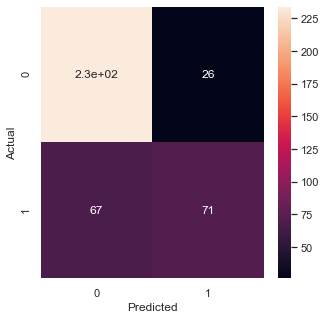

Classifiers:  DecisionTreeClassifier Has a training score of 77.0 % accuracy score


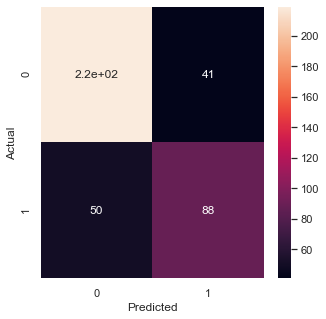

Classifiers:  RandomForestClassifier Has a training score of 79.0 % accuracy score


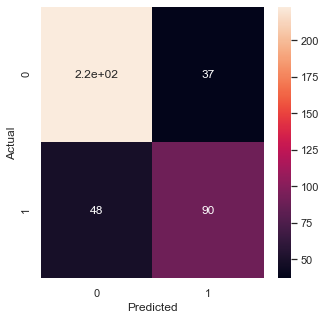


 

################################################  [ TESTING DATA RESULTS ]  ################################################
Classifiers:  LogisticRegression Has a test score of 79.0 % accuracy score


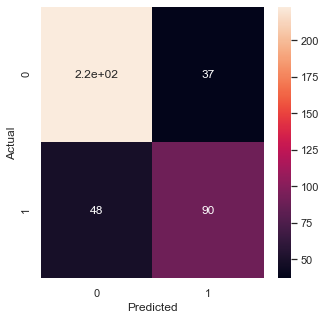

Classifiers:  DecisionTreeClassifier Has a test score of 69.0 % accuracy score


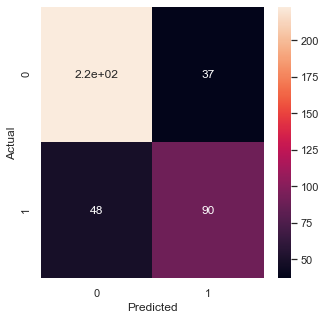

Classifiers:  RandomForestClassifier Has a test score of 76.0 % accuracy score


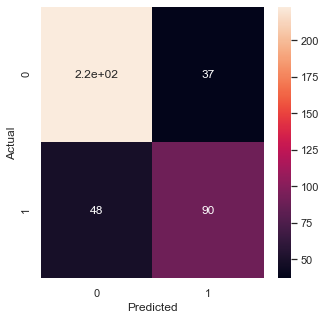

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Let's split train and test data
sns.set(rc={"figure.figsize":(5, 5)})
X_train, X_test, y_train, y_test = train_test_split(OH_X, y, test_size=0.2, random_state=0)

#The models we are going to use:
classifiers = {
    "LogisiticRegression": LogisticRegression(max_iter=200),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier()
}

print ("################################################  [ TRAINNING DATA RESULTS]  ################################################")
#Running our models on training data and plotting a confusion matrix
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

    y_predicted = classifier.predict(X_test)
    confusion_matrix = pd.crosstab(y_test, y_predicted, rownames=['Actual'], colnames=['Predicted'])

    sns.heatmap(confusion_matrix, annot=True)
    plt.show()

print('\n \n')
print ("################################################  [ TESTING DATA RESULTS ]  ################################################")
#Running our models on test data and plotting a confusion matrix.
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_test, y_test, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a test score of", round(training_score.mean(), 2) * 100, "% accuracy score")


    sns.heatmap(confusion_matrix, annot=True)
    plt.show()


As we can see we couldn't get very accurate results...
Logistic Regression performed better with the Test Data.
48 False negatives and 37 False Positives in all methods

I'm out of ideas on how to improve the results...
If you have a sugestion please tell me!